## BACKPROPOGATION IN CNN

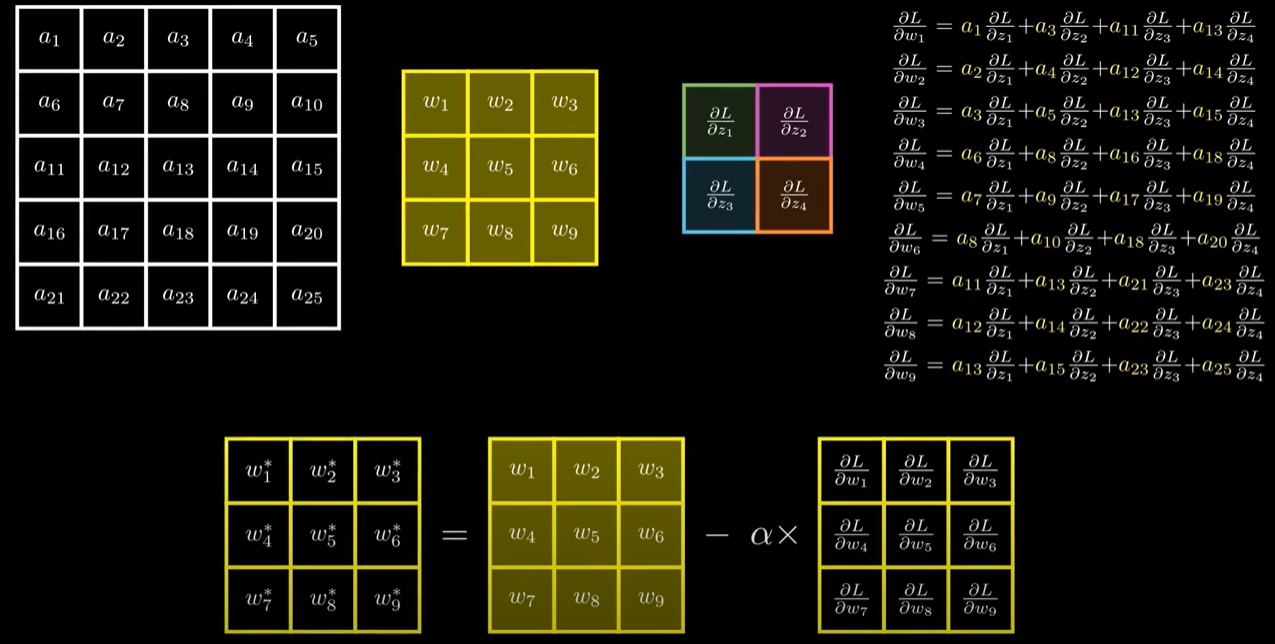

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# dataset has PILimage of range [0,1] we transform them to tensors of normalized range [-1,1[]]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


In [ ]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:08<00:00, 21021416.04it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


# Loading dataset - CIFAR

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=False)


In [ ]:
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

# CNN structure

In [ ]:
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [ ]:
model = ConvNet().to(device)

In [ ]:
#softmax is already included in the cross entropy
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training

In [ ]:
n_total_steps = len(train_loader)
for epoch in range(10):
  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)
    #forward pass
    outputs = model(images)
    loss = criterion(outputs,labels)
    #backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if(i+1)%2000 ==0:
      print(f'Epoch [{epoch+1}/{10}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
print('Finished Training')

Epoch [1/10], Step [2000/12500], Loss: 1.7488
Epoch [1/10], Step [4000/12500], Loss: 2.3124
Epoch [1/10], Step [6000/12500], Loss: 1.6757
Epoch [1/10], Step [8000/12500], Loss: 1.7941
Epoch [1/10], Step [10000/12500], Loss: 1.5094
Epoch [1/10], Step [12000/12500], Loss: 1.7165
Epoch [2/10], Step [2000/12500], Loss: 1.4509
Epoch [2/10], Step [4000/12500], Loss: 1.0850
Epoch [2/10], Step [6000/12500], Loss: 1.1811
Epoch [2/10], Step [8000/12500], Loss: 2.5294
Epoch [2/10], Step [10000/12500], Loss: 1.4169
Epoch [2/10], Step [12000/12500], Loss: 0.7611
Epoch [3/10], Step [2000/12500], Loss: 2.9285
Epoch [3/10], Step [4000/12500], Loss: 2.2695
Epoch [3/10], Step [6000/12500], Loss: 0.9282
Epoch [3/10], Step [8000/12500], Loss: 1.3680
Epoch [3/10], Step [10000/12500], Loss: 1.6186
Epoch [3/10], Step [12000/12500], Loss: 1.5339
Epoch [4/10], Step [2000/12500], Loss: 3.3832
Epoch [4/10], Step [4000/12500], Loss: 1.4891
Epoch [4/10], Step [6000/12500], Loss: 1.1087
Epoch [4/10], Step [8000/125

# Testing

In [ ]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  n_class_correct = [0 for i in range(10)]
  n_class_samples = [0 for i in range(10)]
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    n_samples += labels.size(0)
    _, predicted = torch.max(outputs,1)
    n_correct += (predicted == labels).sum().item()
    for i in range(labels.size(0)):  # Use the actual batch size
      label = labels[i]
      pred = predicted[i]
      if(label == pred):
        n_class_correct[label] += 1
      n_class_samples[label] += 1

  acc = 100.0 * n_correct / n_samples
  print(f'Accuracy of the network: {acc} %')

  for i in range(10):
    acc = 100.0 * n_class_correct[i] / n_class_samples[i]
    print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of the network: 61.4 %
Accuracy of plane: 54.1 %
Accuracy of car: 69.6 %
Accuracy of bird: 49.8 %
Accuracy of cat: 37.8 %
Accuracy of deer: 59.1 %
Accuracy of dog: 61.9 %
Accuracy of frog: 70.0 %
Accuracy of horse: 62.3 %
Accuracy of ship: 82.9 %
Accuracy of truck: 66.5 %


*References used*

[CNN a comprehensive guide](https://medium.com/thedeephub/convolutional-neural-networks-a-comprehensive-guide-5cc0b5eae175)

[Optimizers in CNN](https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/)